# PTML Project Models : Supervised Learning

In [23]:
#Basics imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#First Model
from sklearn.linear_model import SGDClassifier
#Second Model
from sklearn.ensemble import GradientBoostingClassifier

#Third Model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Metrics imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Set grid in our plots
sns.set_theme(style='whitegrid')

## Import Data

In [9]:
df = pd.read_csv("data.csv")
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [10]:
#Quantitative values we want for our models
df_quant = df.iloc[:,1:10]
df_quant

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568
...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322


## Classification models
### SGD Classifier
First of all we are going to show you the repartition of the dataset. This will allow us to commentate the result further in the code.

In [11]:
X = np.array(df_quant)
y = np.array(df['label'])
colors = ["orange", "red", "blue", "yellow", "green", "purple", "gray", "cyan", "black", "pink"]
classes = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=23)

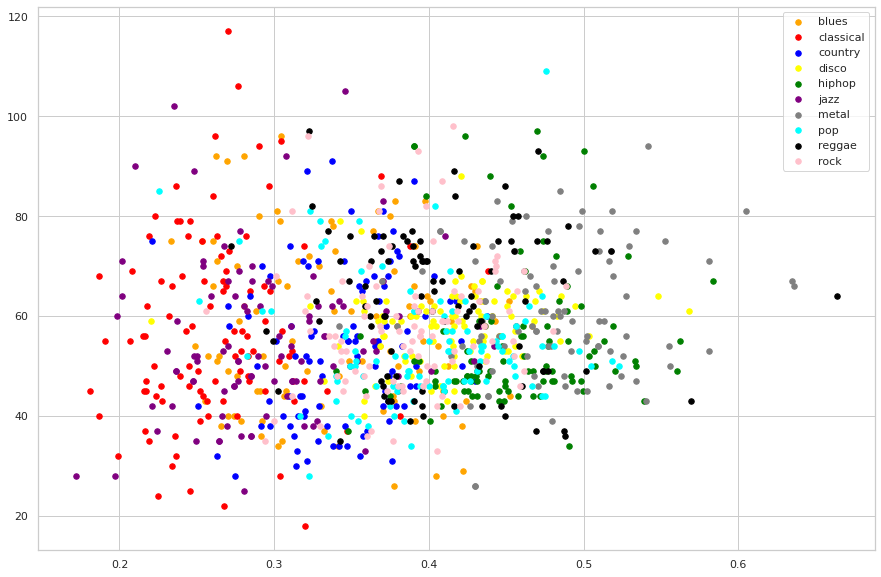

In [14]:
plt.figure(0, figsize=(15,10))
for i, color in zip(classes, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 2],
        X[idx, 1],
        c=color,
        label=i,
        cmap=plt.cm.Paired,
        s=30,
    )
plt.legend()
plt.show()
    

In [15]:
model = SGDClassifier(loss="hinge", l1_ratio=0.15, alpha=0.001, tol=1e-9)

model.fit(X, y)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average="macro") * 100
scores = cross_val_score(model, X_test, y_test, cv=10)

print("Linear SVM :") 
print("Accuracy = " + str(accuracy) + "%")
print("F1-score = " + str(f1) + "%")
print("10 scores calculated  with cross-valisation in a row = " + str(scores))

Linear SVM :
Accuracy = 27.27272727272727%
F1-score = 16.19431643625192%
10 scores calculated  with cross-valisation in a row = [0.09090909 0.21212121 0.3030303  0.15151515 0.12121212 0.15151515
 0.24242424 0.09090909 0.18181818 0.24242424]


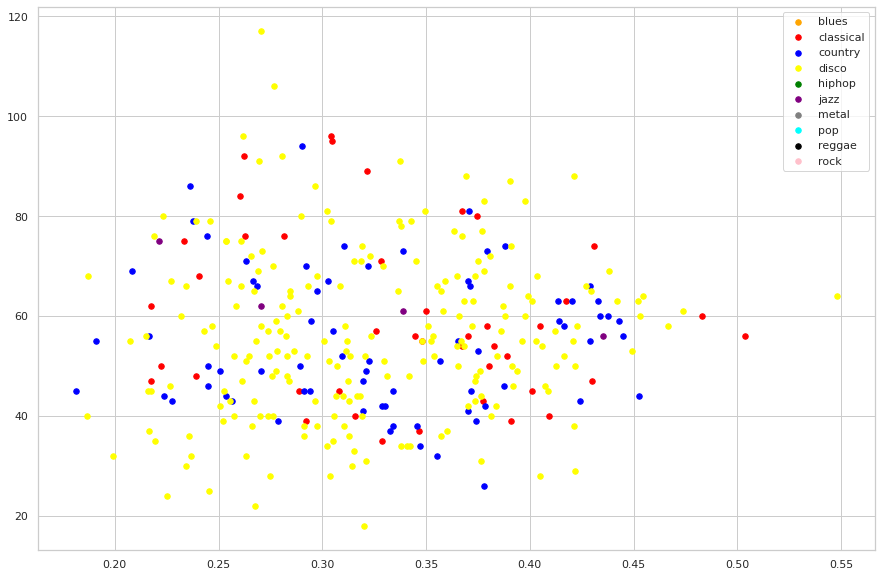

In [16]:
plt.figure(1, figsize=(15,10))
# Plot also the training points
for i, color in zip(classes, colors):
    idx = np.where(y_pred == i)
    plt.scatter(
        X[idx, 2],
        X[idx, 1],
        c=color,
        label=i,
        cmap=plt.cm.Paired,
        s=30,
    )
plt.legend()
plt.show()

### Gradient Boosting Classifier

In [17]:
X = np.array(df_quant)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=23)

In [18]:
gb_clf = GradientBoostingClassifier(learning_rate=0.5, max_features=9, max_depth=2)
gb_clf.fit(X_train, y_train)
y_pred_gb_clf = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gb_clf) * 100
f1 = f1_score(y_test, y_pred_gb_clf, average="macro") * 100
scores = cross_val_score(gb_clf, X_test, y_test, cv=10)

print(f'Gradient boosting accuracy score: {gb_clf.score(X_test, y_test)}')
print("Accuracy = " + str(accuracy) + "%")
print("F1-score = " + str(f1) + "%")
print(" 10 scores calculated  with cross-valisation in a row = " + str(scores))

Gradient boosting accuracy score: 0.5303030303030303
Accuracy = 53.03030303030303%
F1-score = 52.560285181354914%
 10 scores calculated  with cross-valisation in a row = [0.45454545 0.42424242 0.39393939 0.51515152 0.42424242 0.42424242
 0.48484848 0.42424242 0.39393939 0.36363636]


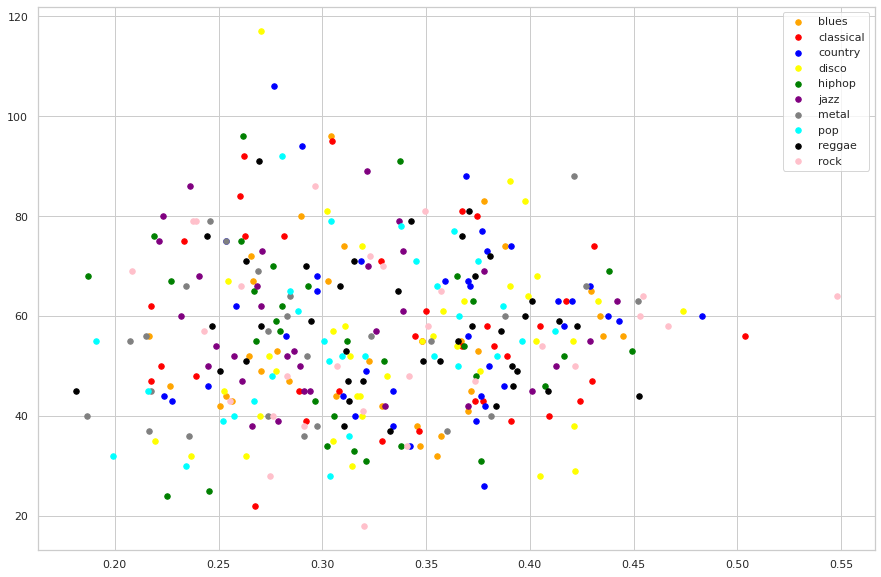

In [19]:
plt.figure(2, figsize=(15,10))
# Plot also the training points
for i, color in zip(classes, colors):
    idx = np.where(y_pred_gb_clf == i)
    plt.scatter(
        X[idx, 2],
        X[idx, 1],
        c=color,
        label=i,
        cmap=plt.cm.Paired,
        s=30,
    )


plt.legend()
plt.show()

### Multi-layer Perceptron
For the perceptron it's a bit different. The first thing we need to do is scale the data.

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_mlp = scaler.transform(X_train)
X_test_mlp = scaler.transform(X_test)

In [21]:
mlp = MLPClassifier(solver='lbfgs',max_iter=50000,hidden_layer_sizes=(10,), random_state=42,early_stopping=True)
mlp.fit(X_train_mlp, y_train)
y_pred_mlp = mlp.predict(X_test_mlp)

accuracy = accuracy_score(y_test, y_pred_mlp) * 100
f1 = f1_score(y_test, y_pred_mlp, average="macro") * 100
scores = cross_val_score(mlp, X_test_mlp, y_test, cv=10)

print(f'Gradient boosting accuracy score: {gb_clf.score(X_test_mlp, y_test)}')
print("Accuracy = " + str(accuracy) + "%")
print("F1-score = " + str(f1) + "%")
print(" 10 scores calculated  with cross-valisation in a row = " + str(scores))

Gradient boosting accuracy score: 0.15757575757575756
Accuracy = 60.909090909090914%
F1-score = 59.876488589149545%
 10 scores calculated  with cross-valisation in a row = [0.45454545 0.45454545 0.48484848 0.48484848 0.54545455 0.42424242
 0.51515152 0.33333333 0.48484848 0.36363636]


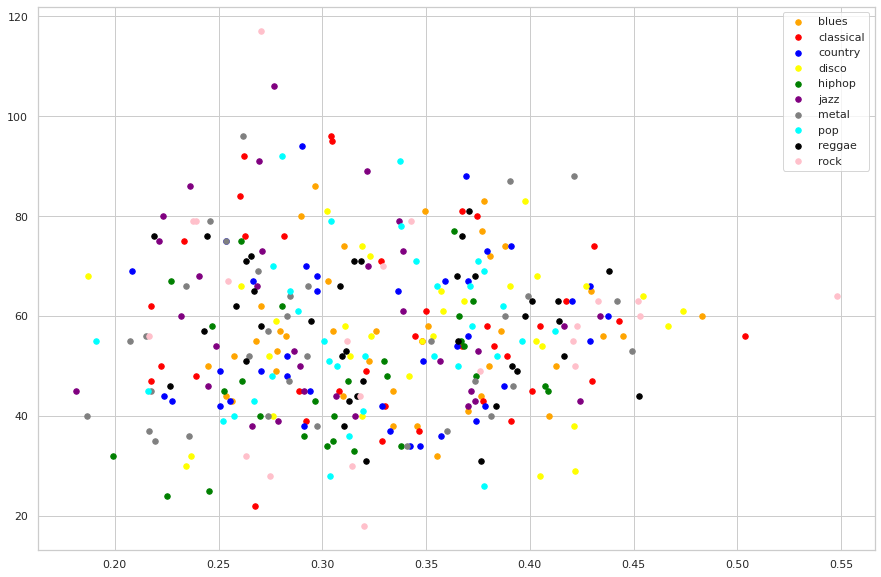

In [22]:
plt.figure(3, figsize=(15,10))
# Plot also the training points
for i, color in zip(classes, colors):
    idx = np.where(y_pred_mlp == i)
    plt.scatter(
        X[idx, 2],
        X[idx, 1],
        c=color,
        label=i,
        cmap=plt.cm.Paired,
        s=30,
    )


plt.legend()
plt.show()